This notebook runs the event segmentation analyses.

## Import libraries

In [8]:
import numpy as np
import pandas as pd
import brainiak.eventseg.event as event
import hypertools as hyp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
import pickle

def score_model(mcorr, model, k, s):
    i1, i2 = np.where(np.round(model.segments_[0])==1)
    w = np.zeros_like(model.segments_[0])
    w[i1,i2] = 1
    w = np.dot(w, w.T).astype(bool)
    return mcorr[w].mean()/mcorr[~w].mean() - k/s
    
def reduce_model(m, ev):
    """Reduce a model based on event labels"""
    w = (np.round(ev.segments_[0])==1).astype(bool)
    return np.array([m[wi, :].mean(0) for wi in w.T])

%matplotlib inline

## Setting paths

In [5]:
datadir = '../../../data/processed/'

## Load data

In [6]:
video_model, recall_models = np.load(datadir+'models_t100_v50_r10.npy')

## Find optimal k for video model

In [ ]:
video_models_allk = []
corrmat = np.corrcoef(video_model)
for i, events in enumerate(range(42, 51)):
    m = {}
    ev = event.EventSegment(events)
    ev.fit(video_model)
    t = np.round(ev.segments_[0]).astype(int)
    mask = np.sum(list(map(lambda x: np.outer(x, x), t.T)), 0).astype(bool)
    within = corrmat[mask].mean()
    across = corrmat[~mask].mean()
    m['model'] = ev
    m['within'] = within
    m['across'] = across
    m['mask'] = mask
    m['k'] = events
    with open(datadir+'video_model_k' + str(events) + '.pkl', 'wb') as f:
        pickle.dump(m, f)
        
video_ev_models = []
for events in range(1, 51):
    try:
        with open(datadir+'video_model_k' + str(events) + '.pkl', 'rb') as f:
            video_ev_models.append(pickle.load(f))
    except:
        video_ev_models.append({'within':None})
    


## Fit event segmentation model to video

In [93]:
ev = event.EventSegment(34)
ev.fit(video_model)
video_events = reduce_model(video_model, ev)

## Save models

In [ ]:
# with open('../data/video_eventseg_model', 'wb') as f:
#     pickle.dump(ev, f)
# np.save('../data/video_events', video_events)

## Get video event times

In [ ]:
video_event_times = []
for s in ev.segments_[0].T:
    tp = np.where(np.round(s)==1)[0]
    video_event_times.append((tp[0], tp[-1]))
np.save(datadir+'video_event_times', video_event_times)

## Fit event segmentation model to recall

In [12]:
ks = list(range(2, 35))
for i, sub in enumerate(recall_models):
    mcorr = np.corrcoef(sub)
    for k in ks:
        ev = event.EventSegment(k)
        ev.fit(sub)
        i1, i2 = np.where(np.round(ev.segments_[0])==1)
        w = np.zeros_like(ev.segments_[0])
        w[i1,i2] = 1
        w = np.dot(w, w.T).astype(bool)
        within = mcorr[w].mean()
        across = mcorr[~w].mean()
        fit = within/across - k/50
        
        m = {
           'subject' : i,
            'model' : ev,
            'within' : within,
            'across' : across,
            'fit' : fit,
            'mask' : w,
            'k' : k
        }
        with open(datadir + 'recall_ev_model_s' + str(i) + 'k' + str(k) + '.pkl', 'wb') as f:
            pickle.dump(m, f)
        print(i, k)

0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
4 33
4 34
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
5 32
5 33
5 34
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6

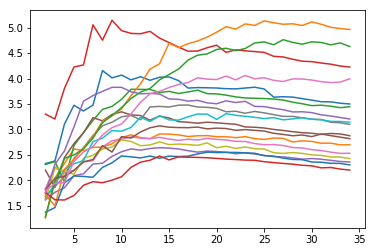

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


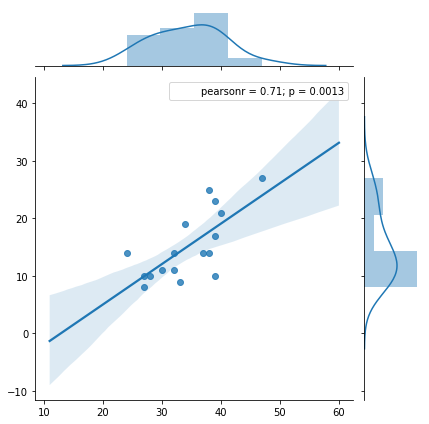

In [86]:
ii = list(range(17))
ks = list(range(2, 35))
models_subs = []
for i in ii:
    models = []
    for k in ks:
        with open(datadir + 'recall_ev_model_s' + str(i) + 'k' + str(k) + '.pkl', 'rb') as f:
            models.append(pickle.load(f))
    models_subs.append(models)

    maxk = []
for model in models_subs:
    plt.plot(ks, list(map(lambda x: (x['within']/x['across']) - x['k']/50, model)))
    maxk.append(ks[np.argmax(list(map(lambda x: (x['within']/x['across']) - x['k']/50, model)))])
plt.show()

from scipy.stats import pearsonr
hand_rec = [27, 24, 32, 33, 32, 39, 30, 39, 28, 40, 34, 38, 47, 38, 27, 37, 39]
sns.jointplot(hand_rec, maxk, kind = 'reg', order = 1, stat_func=pearsonr)

## Fit model to recall using best k

In [87]:
recall_events = []
for i in range(17):
    sub_events = []
    for k in range(2, 35):
        with open(datadir + 'recall_ev_model_s' + str(i) + 'k' + str(k) + '.pkl', 'rb') as f:
            x = pickle.load(f)
        m = reduce_model(recall_models[i], x['model'])
        sub_events.append(m)
    #recall_events.append(sub_events)

## Create average recall model

In [ ]:
matches = np.array([np.argmax(1 - cdist(video_events, r, 'correlation'), 0) for r in recall_events])
avg_recalls = [[] for _ in video_events]
for match, r in zip(matches, recall_events):
    for i, m in enumerate(match):
        avg_recalls[m].append(r[i,:])
avg_recall_events = np.array(list(map(lambda r: np.mean(r, 0) if len(r)>0 else np.zeros((100,)), avg_recalls)))
# avg_recall_events = np.array([a.reshape(100,) for a in avg_recall_events if a.shape==(100,)])

## Create 2D embeddings

In [131]:
np.random.seed(0)
embeddings = hyp.reduce([video_events] + sub_events, reduce='UMAP', ndims=2, normalize=False)

/opt/conda/lib/python3.6/site-packages/hypertools/tools/reduce.py:113: UserWarning: The normalize argument will be deprecated for this function.  Please use the                           analyze function to perform combinations of these transformations.  See API docs for more info: http://hypertools.readthedocs.io/en/latest/hypertools.analyze.html#hypertools.analyze
  analyze function to perform combinations of these transformations.  See API docs for more info: http://hypertools.readthedocs.io/en/latest/hypertools.analyze.html#hypertools.analyze')
/opt/conda/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 15 separate connected components using meta-embedding (experimental)
  n_components


## Save models

In [97]:
# np.save(datadir+'avg_recall_events', avg_recall_events)
np.save(datadir+'embeddings_allks', embeddings)
# np.save(datadir+'labels', matches)
# np.save(datadir+'recall_events', recall_events)
# np.save(datadir+'recall_event_times', recall_event_times)
# with open(datadir+'recall_eventseg_models', 'wb') as f:
#     pickle.dump(recall_eventseg_models, f)